In [1]:
from chatminer.chatparsers import WhatsAppParser

In [65]:
parser = WhatsAppParser("OZDEMIR.txt")
parser.parse_file()
df = parser.parsed_messages.get_df()

05.02.2023 15:25:48 INFO     
            Depending on the platform, the message format in chat logs might not be
            standardized accross devices/versions/localization and might change over
            time. Please report issues including your message format via GitHub.
            
05.02.2023 15:25:48 INFO     Initialized parser.
05.02.2023 15:25:48 INFO     Starting reading raw messages...
05.02.2023 15:25:48 INFO     Inferred date format: day/month/year
05.02.2023 15:25:48 INFO     Finished reading 25824 raw messages.
05.02.2023 15:25:48 INFO     Starting parsing raw messages...
100%|██████████| 25824/25824 [00:03<00:00, 8444.83it/s] 
05.02.2023 15:25:51 INFO     Finished parsing raw messages.


In [68]:
df = df[df["author"]=="İgos Seyit"]
import chatminer.visualizations as vis
import matplotlib.pyplot as plt
df.tail()

,timestamp,author,message,weekday,hour,words,letters
25739,2019-09-07 23:08:00,İgos Seyit,Maç izliyom internetten babamla,Saturday,23,5,32
25741,2019-09-07 23:06:00,İgos Seyit,O da var eve götürecektık onlar,Saturday,23,6,31
25743,2019-09-07 23:04:00,İgos Seyit,Sorun yok uyuyacağız bizim çarşaflar var,Saturday,23,6,40
25810,2019-09-02 13:05:00,İgos Seyit,Yerinden ayda yılda bir oynar her evin olmazsa...,Monday,13,16,111
25820,2019-08-25 01:29:00,İgos Seyit,http://heraiptv.vip:8080/get.php?username=seyi...,Sunday,1,1,98


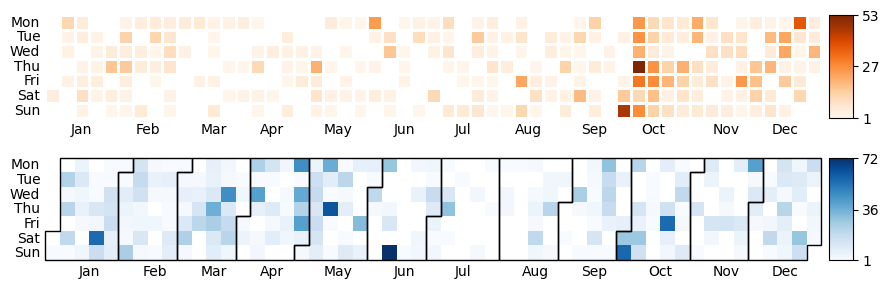

In [73]:
fig, ax = plt.subplots(2, 1, figsize=(9, 3))
ax[0] = vis.calendar_heatmap(df, year=2021, cmap='Oranges', ax=ax[0])
ax[1] = vis.calendar_heatmap(df, year=2022, linewidth=0, monthly_border=True, ax=ax[1])


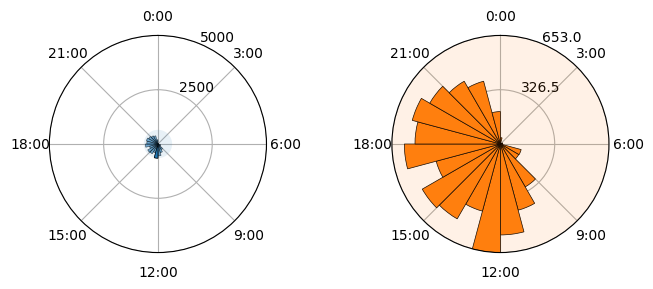

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(7, 3), subplot_kw={'projection': 'polar'})
ax[0] = vis.sunburst(df, highlight_max=True, isolines=[2500, 5000], isolines_relative=False, ax=ax[0])
ax[1] = vis.sunburst(df, highlight_max=False, isolines=[0.5, 1], color='C1', ax=ax[1])

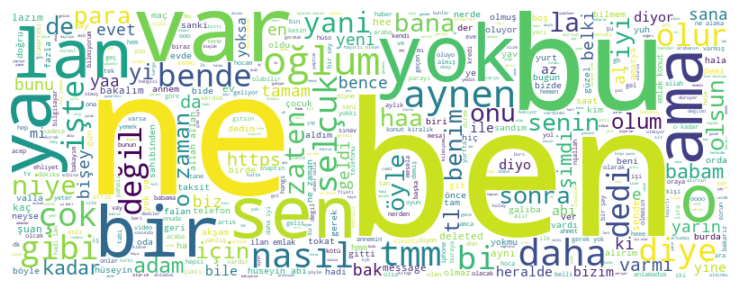

In [71]:
fig, ax = plt.subplots(figsize=(8, 3))
stopwords = ['these', 'are', 'stopwords',"media","omitted"]
kwargs={"background_color": "white", "width": 800, "height": 300, "max_words": 500}
ax = vis.wordcloud(df, ax=ax, stopwords=stopwords, **kwargs)